<a href="https://colab.research.google.com/github/dohb128/BigData/blob/main/BD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 오픈 API 연결

In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json
import urllib.parse

client_id = 'pzhBfPcGK6NuBiQrGHuM'
client_secret = 'EN7jUsuFHZ'

def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL: %s" % (datetime.datetime.now(), url))
        return None

def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)

    if responseDecode is None:
        return None
    else:
        return json.loads(responseDecode)

def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt': cnt, 'title': title, 'description': description, 'org_link': org_link, 'link': link, 'pDate': pDate})
    return

def main():
    node = 'news'
    player_names = [
        '노시환', '홍창기', '오스틴', '최정', '서진용', '구자욱', '박영현', '손아섭', '알칸타라',
        '페디', '고영표', '뷰캐넌', '후라도', '김혜성', '쿠에바스', '정수빈'
    ]
    cnt = 0
    jsonResult = []

    for player in player_names:
        srcText = player + ' KBO MVP'  # 각 선수 이름과 'KBO MVP'를 조합
        start = 1  # 검색 결과의 시작 위치

        while True:
            jsonResponse = getNaverSearch(node, srcText, start, 100)

            if jsonResponse is None:
                print("검색 결과가 없거나 오류가 발생했습니다.")
                break

            total = jsonResponse['total']

            for post in jsonResponse['items']:
                pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
                # 2023년에 해당하는 결과만 가져옴
                if pDate.year == 2023 and 3 <= pDate.month <= 11:   # 23년 3월부터 11월까지의 기사 수집
                    cnt += 1
                    getPostData(post, jsonResult, cnt)

            start += 100  # 다음 페이지 검색 시작 위치

            if start > total:
                break  # 모든 검색 결과를 가져온 경우 종료

    print('전체 검색 : %d 건' % total)

    with open('KBO_MVP_후보_naver_%s.json' % node, 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" % (cnt))
    print('KBO_MVP_후보_naver_%s.json SAVED' % node)

if __name__ == '__main__':
    main()



[2023-11-20 02:09:34.783830] Url Request Success
[2023-11-20 02:09:35.950821] Url Request Success
[2023-11-20 02:09:37.107510] Url Request Success
[2023-11-20 02:09:38.273766] Url Request Success
[2023-11-20 02:09:39.454742] Url Request Success
[2023-11-20 02:09:40.656891] Url Request Success
[2023-11-20 02:09:41.824920] Url Request Success
[2023-11-20 02:09:42.981455] Url Request Success
[2023-11-20 02:09:43.947491] Url Request Success
[2023-11-20 02:09:44.934970] Url Request Success
[2023-11-20 02:09:46.125345] Url Request Success
[2023-11-20 02:09:47.270221] Url Request Success
[2023-11-20 02:09:48.452936] Url Request Success
[2023-11-20 02:09:49.593440] Url Request Success
[2023-11-20 02:09:50.746801] Url Request Success
[2023-11-20 02:09:51.908879] Url Request Success
[2023-11-20 02:09:53.057805] Url Request Success
[2023-11-20 02:09:54.225991] Url Request Success
[2023-11-20 02:09:55.204937] Url Request Success
[2023-11-20 02:09:56.212757] Url Request Success
[2023-11-20 02:09:57

월별 선수 언급 기사 카운트

In [2]:
import json
from collections import defaultdict
from datetime import datetime

# json 파일 읽기
with open('KBO_MVP_후보_naver_news.json', 'r', encoding='utf8') as file:
    data = json.load(file)

# 선수 이름별, 월별로 기사 개수를 저장하는 딕셔너리
article_count = defaultdict(lambda: defaultdict(int))
player_names = [
        '노시환', '홍창기', '오스틴', '최정', '서진용', '구자욱', '박영현', '손아섭', '알칸타라',
        '페디', '고영표', '뷰캐넌', '후라도', '김혜성', '쿠에바스', '정수빈'
    ]

for item in data:
    title = item['title']
    # 기사의 발행일로부터 월을 추출
    month = datetime.strptime(item['pDate'], '%Y-%m-%d %H:%M:%S').month
    for player in player_names:
        # 기사 제목에 선수 이름이 포함되어 있다면 카운트
        if player in title:
            article_count[player][month] += 1

# 선수별, 월별 기사 개수를 출력
for player, counts in article_count.items():
    print(f"{player}:")
    for month, count in sorted(counts.items()):
        print(f"  {month}월: {count}건")


노시환:
  3월: 7건
  4월: 1건
  5월: 1건
  6월: 5건
  7월: 71건
  8월: 217건
  9월: 112건
  10월: 484건
  11월: 3건
페디:
  4월: 1건
  5월: 96건
  6월: 2건
  7월: 6건
  8월: 36건
  9월: 104건
  10월: 881건
  11월: 72건
김혜성:
  3월: 1건
  5월: 3건
  6월: 1건
  10월: 8건
  11월: 4건
최정:
  3월: 2건
  4월: 1건
  5월: 6건
  6월: 33건
  7월: 203건
  8월: 21건
  10월: 21건
  11월: 3건
홍창기:
  5월: 2건
  6월: 6건
  8월: 3건
  9월: 38건
  10월: 71건
  11월: 21건
오스틴:
  3월: 1건
  9월: 2건
  10월: 4건
  11월: 8건
구자욱:
  4월: 4건
  6월: 1건
  7월: 1건
  8월: 7건
  9월: 47건
  10월: 16건
뷰캐넌:
  7월: 31건
  10월: 29건
손아섭:
  3월: 1건
  5월: 7건
  6월: 7건
  7월: 3건
  10월: 34건
쿠에바스:
  8월: 2건
  9월: 224건
  10월: 18건
  11월: 56건
고영표:
  7월: 1건
  8월: 62건
  9월: 10건
  11월: 104건
박영현:
  7월: 4건
  9월: 38건
  10월: 13건
  11월: 17건
정수빈:
  5월: 2건
  6월: 1건
  7월: 4건
  8월: 3건
  10월: 1건
서진용:
  5월: 24건
  6월: 18건
  7월: 1건
  8월: 1건
  10월: 4건
알칸타라:
  3월: 2건
  5월: 2건
  7월: 1건
  10월: 2건
후라도:
  9월: 3건


In [3]:
import json
from collections import defaultdict
from datetime import datetime



# json 파일 읽기
with open('KBO_MVP_후보_naver_news.json', 'r', encoding='utf8') as file:
    data = json.load(file)

# 선수 이름별, 월별로 기사 개수를 저장하는 딕셔너리
article_count = defaultdict(lambda: defaultdict(int))

for item in data:
    title = item['title']
    # 기사의 발행일로부터 월을 추출
    month = datetime.strptime(item['pDate'], '%Y-%m-%d %H:%M:%S').month
    player_names = [
        '노시환', '홍창기', '오스틴', '최정', '서진용', '구자욱', '박영현', '손아섭', '알칸타라',
        '페디', '고영표', '뷰캐넌', '후라도', '김혜성', '쿠에바스', '정수빈'
    ]

    for player in player_names:
        # 기사 제목에 선수 이름이 포함되어 있다면 카운트
        if player in title:
            article_count[player][month] += 1

# 결과를 json 파일로 저장
with open('player_mentions.json', 'w', encoding='utf8') as file:
    json.dump(article_count, file, ensure_ascii=False, indent=4)

print('선수 이름별, 월별 기사 언급 횟수가 player_mentions.json 파일에 저장되었습니다.')


선수 이름별, 월별 기사 언급 횟수가 player_mentions.json 파일에 저장되었습니다.


한글 폰트 설정

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

그래프화

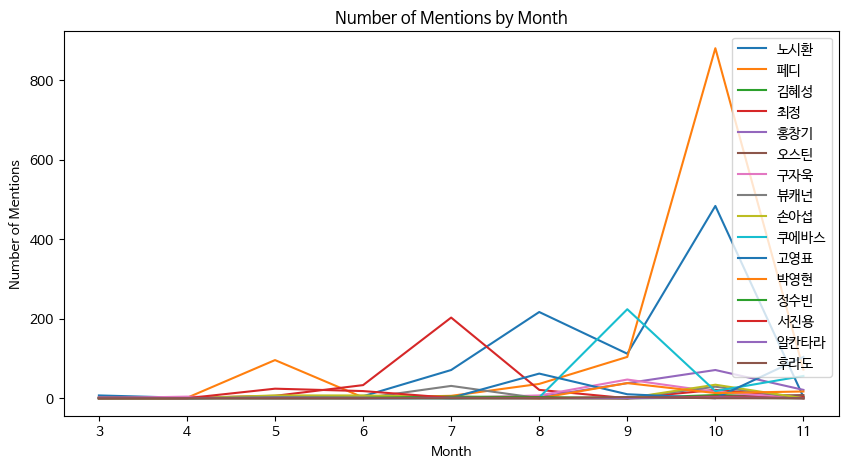

In [4]:
import json
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# json 파일 읽기
with open('player_mentions.json', 'r', encoding='utf8') as file:
    article_count = json.load(file)

# 한 플롯에 모든 선수의 그래프 그리기
plt.figure(figsize=(10, 5))

for player, counts in article_count.items():
    # 월별 기사 언급 횟수를 리스트로 변환
    mentions = [counts.get(str(month), 0) for month in range(3, 12)]
    # 그래프 그리기
    plt.plot(range(3, 12), mentions, label=player)

plt.title('Number of Mentions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Mentions')
plt.legend(loc='upper right')
plt.show()
